In [1]:
from kan import KAN, create_dataset, KANLayer
import torch

In [24]:
class Zero(torch.nn.Module):
    inplace: bool

    def __init__(self, inplace: bool = False):
        super().__init__()
        self.inplace = inplace

    def forward(self, x: torch.Tensor):
        if self.inplace:
            x *= 0.0000001
        else:
            return x * 0.0000001

model = KAN(width=[1,4,4,1], grid=6, k=3, seed=33)#, base_fun=Zero(), sb_trainable=False)

In [25]:
def target_fn(x):
    x_abs = (x * 1.5).abs()
    return x + x_abs - x_abs.trunc()
dataset = create_dataset(target_fn, n_var=1)

In [26]:
model.train(dataset, opt="Adam", steps=200);

train loss: nan | test loss: nan | reg: nan :   5%|▊               | 10/200 [00:00<00:02, 64.25it/s]


Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.


RuntimeError: false INTERNAL ASSERT FAILED at "../aten/src/ATen/native/BatchLinearAlgebra.cpp":1539, please report a bug to PyTorch. torch.linalg.lstsq: (Batch element 0): Argument 6 has illegal value. Most certainly there is a bug in the implementation calling the backend library.

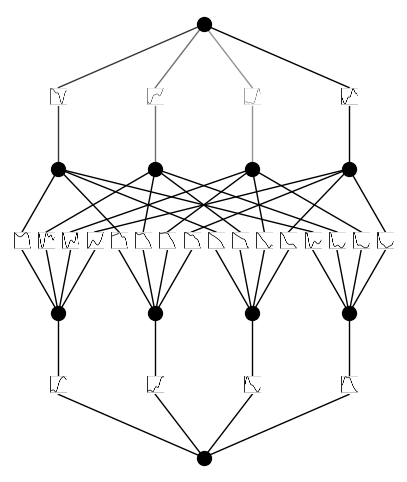

In [19]:
model.plot(beta=100)

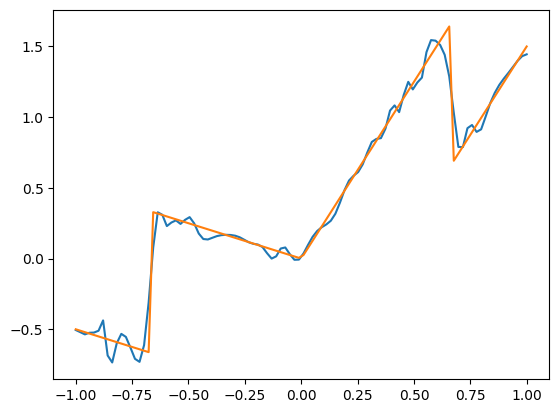

In [20]:
# plot model response across the input space
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 1, 100)
y_pred = model(torch.tensor(x).view(-1,1)).detach().numpy()
y_actual = target_fn(torch.tensor(x).view(-1,1)).numpy()
plt.plot(x, y_pred, label="model")
plt.plot(x, y_actual, label="actual")

In [54]:
(float(model.biases[0].cpu().weight[0][0]), float(model.biases[1].cpu().weight[0][0]))

(-5.002864360809326, 0.9966086149215698)